# Unsupervised Learning | Project 1

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multi-valued discrete and 4 continuous variables. 

Data set: cars-dataset.csv

**Attribute Information:**

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Acceleration – continuous

Yr – Model of the car – Multivalued discrete

Mpg - Miles per gallon - continuous

Total points: 30

**Steps to follow:**

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data set) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

## 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [1]:
#Importing numpy, pandas, matplotlib, seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read dataset
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
#Let's read the info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
#We don't have any missing values which is good
#We have 'car name' & surprisingly 'hp' columns as Categorical data
#Let's first check car name column if it's useful for our analysis or shall we drop it
df['car name'].value_counts()

ford pinto                           6
toyota corolla                       5
ford maverick                        5
amc matador                          5
amc gremlin                          4
peugeot 504                          4
toyota corona                        4
amc hornet                           4
chevrolet impala                     4
chevrolet chevette                   4
chevrolet caprice classic            3
chevrolet nova                       3
volkswagen dasher                    3
chevrolet vega                       3
plymouth fury iii                    3
ford galaxie 500                     3
dodge colt                           3
ford gran torino                     3
plymouth duster                      3
chevrolet citation                   3
pontiac catalina                     3
honda civic                          3
opel manta                           2
subaru dl                            2
oldsmobile cutlass salon brougham    2
chevrolet chevelle malibu

In [5]:
#For 398 records, we have 305 unique car names. So, we shall drop car name column as it is useless for our analysis
df.drop('car name', axis=1, inplace=True)

In [6]:
#Let's now study why 'hp' column is categorical when printing the head of the DataFrame seemed like it should be int
df[~df['hp'].str.isdigit()]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [7]:
#So, we have few missing values represented as '?'. Let's replace them with NaN
df['hp'] = df['hp'].replace('?', np.NaN)

In [8]:
#Now, let's apply KNN Imputer to replace those missing values rather than replacing them with mean, median or mode.
#But, since KNN works well on standardized data. Let's first standardize it.

#Importing StandardScaler submodule from preprocessing module in sklearn library
from sklearn.preprocessing import StandardScaler

#Initializing StandardScaler
scaler = StandardScaler()

#Scale the data
ndArr_std = scaler.fit_transform(df.drop('mpg', axis=1))

In [9]:
#Importing KNN module from fancyimpute library
from fancyimpute import KNN

#Impute missing values. Excluding last column as that is what we want to predict
#We can use same strategy in production to impute missing values & predict mpg
ndArr_std_imputed = KNN(k=5).fit_transform(ndArr_std)

Using TensorFlow backend.


Imputing row 1/398 with 0 missing, elapsed time: 0.047
Imputing row 101/398 with 0 missing, elapsed time: 0.047
Imputing row 201/398 with 0 missing, elapsed time: 0.047
Imputing row 301/398 with 0 missing, elapsed time: 0.047


In [10]:
#Now, let's get back original DataFrame by inverse transforming
ndArr_imputed = scaler.inverse_transform(ndArr_std_imputed)
df_imputed = pd.DataFrame(ndArr_imputed, columns=df.columns[:-1])

#Append last column
df_imputed['mpg'] = df['mpg']

#Checking df_imputed
df_imputed.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [11]:
#Now, let's study 5-point analysis of imputed DataFrame
df_imputed.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.096591,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.360368,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [12]:
#cyl column appears to be discrete with more than 50% of the cars having cylinders between 3 & 4 & on higher-end cars, we have at least 25% cars with 8 cylibders
#disp column appears to be positively skewed but without any outliers
#hp column appears to be positively skewed with few outliers on right tail
#wt column appears to be positively skewed but without any outliers
#acc column appears to be bit positively skewed with few outliers on right tail
#yr column appears to be uniformly distributed
#mpg column is our Target column which appears to be bit positively skewed with very few outliers on right tail

## 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data set) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


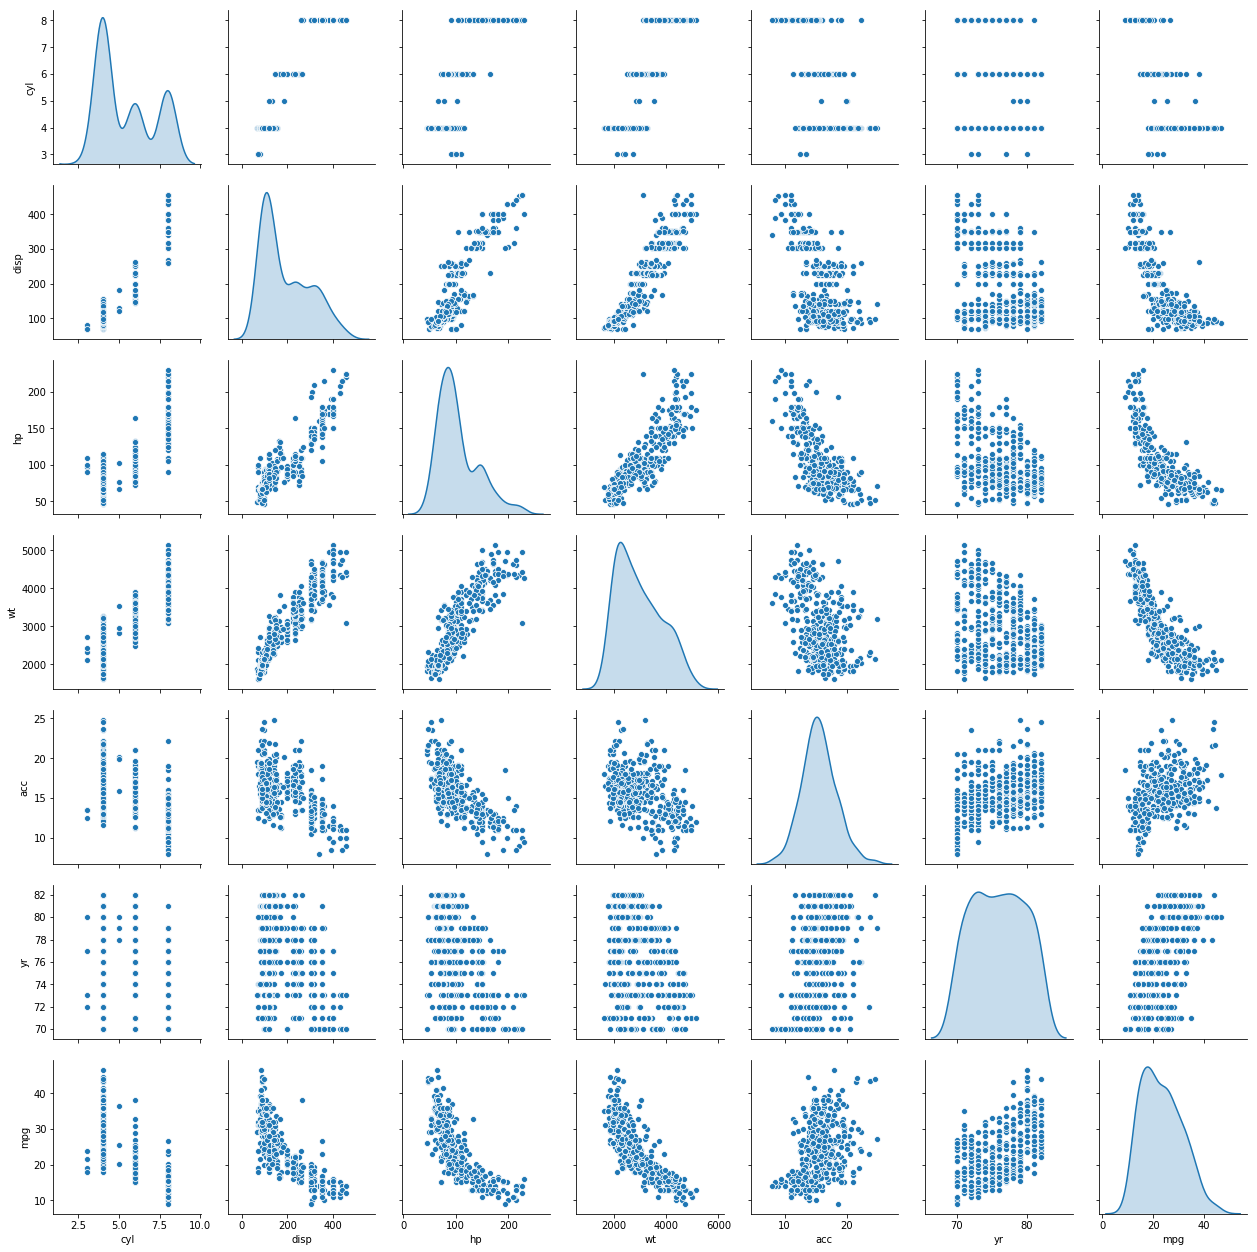

In [13]:
#Let's now study pairplot of DataFrame to see if we have any multimodal distrbutions visible to determine number of clusters
sns.pairplot(df_imputed, diag_kind='kde')
plt.show()

In [14]:
#cyl has 3 very clear peaks represented by 4, 6 & 8 with maximum spike at 4 which might represent small cars & next peak of 8 might represent SUVs or Sport's car & 6 might be Sedans
#disp again has 3 peaks with highest peak for low disp which again might represent small cars, and there are 2 medium peaks which might be representing Sedans, SUVs / Sports cars
#hp has 1 big peak for low hp representing small cars, another medium peak at center which might be represented by Sedans & SUVs & there is very small submerged peak for high hp, which might be representation for Sports cars
#acc doesn't have any distinct peaks & appears normal with slighly long tail which might again be due to Sports cars
#yr has 2 submerged peaks visible in an otherwise uniform distribution
#mpg has 2 submerged peaks with slight positive skew which might be due to presence of large number of small cars.
#We can also see some correlation between at least some variables & also see mpg correlated with few columns but relation doesn't look very linear
#Anyways, it might be intersting to see if mpg is better explained if we deal with each clusters differently

## 3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

For no. of clusters = 2 , the average silhouette_score is : 0.5050552146581923


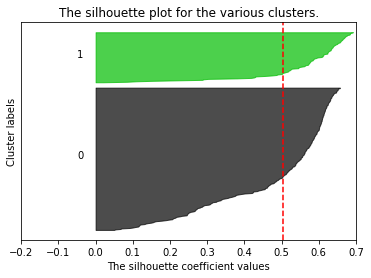

For no. of clusters = 3 , the average silhouette_score is : 0.3577817290812128


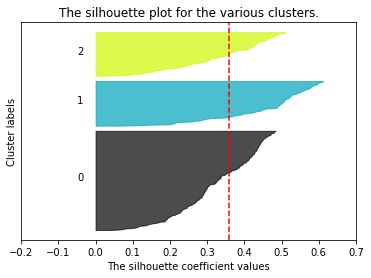

For no. of clusters = 4 , the average silhouette_score is : 0.35066086666116403


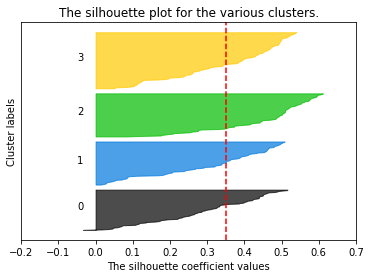

For no. of clusters = 5 , the average silhouette_score is : 0.33707073247286773


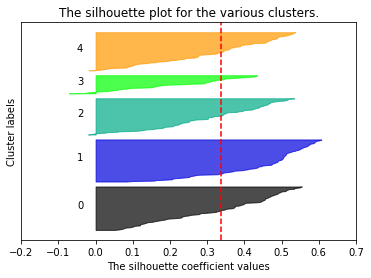

For no. of clusters = 6 , the average silhouette_score is : 0.2970796650860208


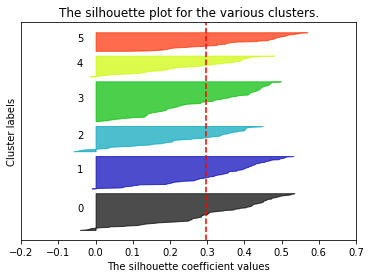

For no. of clusters = 7 , the average silhouette_score is : 0.2852105575957625


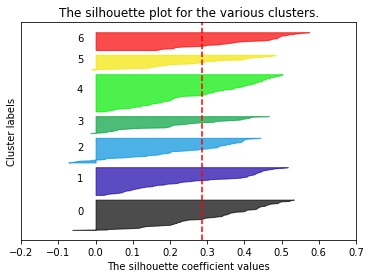

For no. of clusters = 8 , the average silhouette_score is : 0.2794762720449977


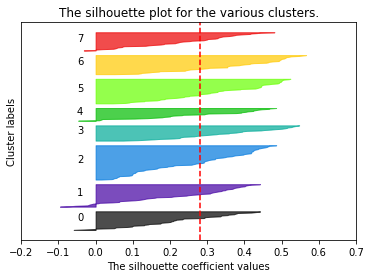

For no. of clusters = 9 , the average silhouette_score is : 0.28417945547263535


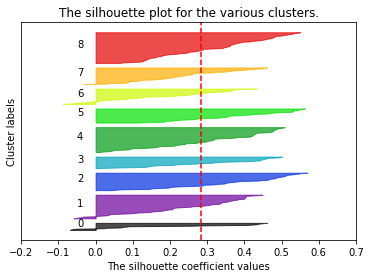

For no. of clusters = 10 , the average silhouette_score is : 0.28397617062818364


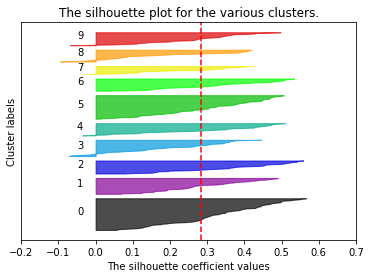

In [15]:
#Let's try using K-means clustering which is most widely used Unsupervised model to see if there are any clusters

#Importing KMeans submodule from cluster module in sklearn library
from sklearn.cluster import KMeans

#Importing metrics module from sklearn library
from sklearn import metrics

#Importing cm module from matplotlib library for ColorMaps
import matplotlib.cm as cm

#Assigning a dummy arrays Cluster_error & cluster_sil_scores
Cluster_error = []
cluster_sil_scores = []

#Defining cluster range from 1 to 10 though the minimum clusters we should find is 3 as it will help visualize Elbow plot
cluster_range = range(1, 11)

#Fit model KMeans for each value of cluster in the range defined in cluster_range
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 5)
    clusters.fit(ndArr_std_imputed)
    Cluster_error.append(clusters.inertia_)
    labels = clusters.labels_

    #Since, 
    if num_clusters == 1:
        cluster_sil_scores.append(np.NaN)
        continue
        
    cluster_sil_scores.append(metrics.silhouette_score(ndArr_std_imputed, labels, metric='euclidean'))

    #The silhouette_score gives the average value for all the samples.
    #This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = metrics.silhouette_score(ndArr_std_imputed, labels)
    print("For no. of clusters =", num_clusters, ", the average silhouette_score is :", silhouette_avg)

    #Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(ndArr_std_imputed, labels)
    
    y_lower = 10
    for i in range(num_clusters):
        #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        #Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster labels")
    plt.yticks([])
    plt.xlim([-0.2, 0.7])

    #The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    #Show the plot for each number of clusters
    plt.show()

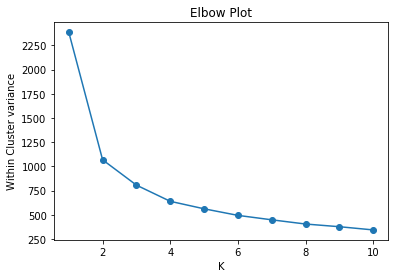

In [16]:
#Plotting Elbow plot
plt.plot(cluster_range, Cluster_error, marker = "o")
plt.xlabel('K')
plt.ylabel('Within Cluster variance')
plt.title('Elbow Plot')
plt.show()

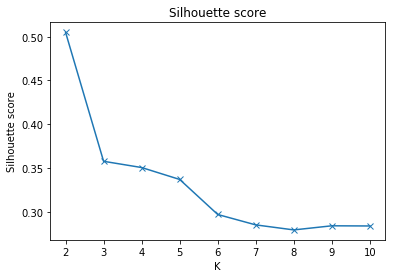

In [17]:
#Plotting Silhouette score
plt.plot(cluster_range, cluster_sil_scores, marker = 'x')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

In [18]:
#Studying Elbow plot shows that there might be 2 to 4 clusters but the bend is not very clear.

#Studying Silhouette score plot, the best no. of cluster seems to be 2 after which there is steep fall in the avergae score.
#If not 2, no. of clusters may be between 3 to 5 after which again there is significant fall in average score.

#Now, let's study the Silhouette plot carefully.
#For 2 clusters, though we have very good average silhouette scores, cluster size for cluster 0 is almost thrice the cluster size for cluster 1.
#For 3 clusters, all clusters have good above average silhouette scores, but cluster size for cluster 1 is almost double the other 2.
#For 4 clusters, all clusters have good above average silhouette scores with average silhoutte score dropping only slightly then 3 clusters.
#Also, cluster sizes are almost equal which is good. But, there are very few cases of mis-classifications for Cluster 2.
#For 5 clusters, the cluster 2 has poor silhouette score though above average & also it's cluster size is too small.
#Also, there are mis-classification cases in at least 3 clusters.
#Beyond 5 clusters, the average silhouette scores are poor relatively & each one has some data mis-classified.

#So, from above analysis, we can select 2 or 4 clusters which is clearly shown from all the 3 plots above.
#But since 1 of the clusters is too big when number of clusters considered is 2 or 3,
#we select 4 as the best number of clusters for our further analysis.

In [19]:
#Let's retrain KMeans model with K=4
clusters = KMeans(4, random_state = 5)
clusters.fit(ndArr_std_imputed)
Cluster_error.append(clusters.inertia_)
labels = clusters.labels_

In [20]:
#Seperating the clusters by adding a column 'GROUP' to identify each cluster
df_imputed['GROUP'] = labels

#Checking the new DataFrame
df_imputed.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0,2
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0,2
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0,2
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0,2
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0,2


## 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [21]:
#Splitting DataFrame by 'GROUP' column
gb = df_imputed.groupby('GROUP')    
df_clustered = [gb.get_group(x) for x in gb.groups]

#Importing train_test_split submodule from model_selection module in sklearn library
from sklearn.model_selection import train_test_split

#Let's split the data into train & test datasets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df_clustered[0].drop(['GROUP', 'mpg'], axis=1), df_clustered[0]['mpg'], test_size=0.30, random_state=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_clustered[1].drop(['GROUP', 'mpg'], axis=1), df_clustered[1]['mpg'], test_size=0.30, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_clustered[2].drop(['GROUP', 'mpg'], axis=1), df_clustered[2]['mpg'], test_size=0.30, random_state=1)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_clustered[3].drop(['GROUP', 'mpg'], axis=1), df_clustered[3]['mpg'], test_size=0.30, random_state=1)

In [22]:
#Importing Lasso submodule from linear_model module in sklearn library
from sklearn.linear_model import Lasso

In [23]:
#Let's initialize some variables which we will make them point the best accuracy
best_score_0 = -1
best_score_1 = -1
best_score_2 = -1
best_score_3 = -1
best_model_0 = Lasso()
best_model_1 = Lasso()
best_model_2 = Lasso()
best_model_3 = Lasso()

#Let's iterate for alpha ranging from 0.00001 to 100000 & try fitting Lasso model on training data & calculating score on test data
for a in [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_0, y_train_0)
    s = lasso.score(X_test_0, y_test_0)
    if s >= best_score_0:
        best_score_0 = s
        best_model_0 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_1, y_train_1)
    s = lasso.score(X_test_1, y_test_1)
    if s >= best_score_1:
        best_score_1 = s
        best_model_1 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_2, y_train_2)
    s = lasso.score(X_test_2, y_test_2)
    if s >= best_score_2:
        best_score_2 = s
        best_model_2 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_3, y_train_3)
    s = lasso.score(X_test_3, y_test_3)
    if s >= best_score_3:
        best_score_3 = s
        best_model_3 = lasso

In [24]:
#Printing the best score for each clusters with coefficients of their individual models
print("Best score for Cluster 0 is", best_score_0, "for alpha value of", best_model_0.alpha)
print("Intercept: ", best_model_0.intercept_)
for idx, col_name in enumerate(df_clustered[0].drop(['GROUP', 'mpg'], axis=1).columns):
    print("The coefficient for {} is {}".format(col_name, best_model_0.coef_[idx]))
print("\nBest score for Cluster 1 is", best_score_1, "for alpha value of", best_model_1.alpha)
print("Intercept: ", best_model_1.intercept_)
for idx, col_name in enumerate(df_clustered[1].drop(['GROUP', 'mpg'], axis=1).columns):
    print("The coefficient for {} is {}".format(col_name, best_model_1.coef_[idx]))
print("\nBest score for Cluster 2 is", best_score_2, "for alpha value of", best_model_2.alpha)
print("Intercept: ", best_model_2.intercept_)
for idx, col_name in enumerate(df_clustered[2].drop(['GROUP', 'mpg'], axis=1).columns):
    print("The coefficient for {} is {}".format(col_name, best_model_2.coef_[idx]))
print("\nBest score for Cluster 3 is", best_score_3, "for alpha value of", best_model_3.alpha)
print("Intercept: ", best_model_3.intercept_)
for idx, col_name in enumerate(df_clustered[3].drop(['GROUP', 'mpg'], axis=1).columns):
    print("The coefficient for {} is {}".format(col_name, best_model_3.coef_[idx]))

Best score for Cluster 0 is 0.4566085756960314 for alpha value of 2
Intercept:  -3.817109714361937
The coefficient for cyl is 0.0
The coefficient for disp is 0.0070415219136742545
The coefficient for hp is 0.0009427680011768237
The coefficient for wt is -0.005777618980873065
The coefficient for acc is -0.0
The coefficient for yr is 0.5367455881977494

Best score for Cluster 1 is 0.6161438519138991 for alpha value of 0.2
Intercept:  18.720550656113733
The coefficient for cyl is 0.0
The coefficient for disp is 0.011106884587560257
The coefficient for hp is -0.007997111060546203
The coefficient for wt is -0.008107172791690336
The coefficient for acc is 0.0
The coefficient for yr is 0.3391008935365061

Best score for Cluster 2 is 0.3122498681858472 for alpha value of 1e-05
Intercept:  8.368709081357796
The coefficient for cyl is 0.0
The coefficient for disp is 0.0004059043895512847
The coefficient for hp is -0.034116671803573397
The coefficient for wt is -0.0012923272804168323
The coeffici

In [25]:
#The best accuracies for inidividual models range in the range of 0.31 to 0.61 which isn't very good.
#Let's use polynomial features & see if it improves the accuracy

#Importing PolynomialFeatures submodule from preprocessing module in sklearn library
from sklearn.preprocessing import PolynomialFeatures

#Initilizing PolynomialFeatures with degree = 2
poly = PolynomialFeatures(degree = 2, include_bias=False )

#Getting polynomial Features
X_poly_0 = poly.fit_transform(df_clustered[0].drop(['GROUP', 'mpg'], axis=1))
X_poly_1 = poly.fit_transform(df_clustered[1].drop(['GROUP', 'mpg'], axis=1))
X_poly_2 = poly.fit_transform(df_clustered[2].drop(['GROUP', 'mpg'], axis=1))
X_poly_3 = poly.fit_transform(df_clustered[3].drop(['GROUP', 'mpg'], axis=1))

#Let's split the data into train & test datasets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_poly_0, df_clustered[0]['mpg'], test_size=0.30, random_state=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_poly_1, df_clustered[1]['mpg'], test_size=0.30, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly_2, df_clustered[2]['mpg'], test_size=0.30, random_state=1)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_poly_3, df_clustered[3]['mpg'], test_size=0.30, random_state=1)

In [26]:
#Let's initialize some variables which we will make them point the best accuracy
best_score_0 = -1
best_score_1 = -1
best_score_2 = -1
best_score_3 = -1
best_model_0 = Lasso()
best_model_1 = Lasso()
best_model_2 = Lasso()
best_model_3 = Lasso()

#Let's iterate for alpha ranging from 0.00001 to 100000 & try fitting Lasso model on training data & calculating score on test data
for a in [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_0, y_train_0)
    s = lasso.score(X_test_0, y_test_0)
    if s >= best_score_0:
        best_score_0 = s
        best_model_0 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_1, y_train_1)
    s = lasso.score(X_test_1, y_test_1)
    if s >= best_score_1:
        best_score_1 = s
        best_model_1 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_2, y_train_2)
    s = lasso.score(X_test_2, y_test_2)
    if s >= best_score_2:
        best_score_2 = s
        best_model_2 = lasso
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_3, y_train_3)
    s = lasso.score(X_test_3, y_test_3)
    if s >= best_score_3:
        best_score_3 = s
        best_model_3 = lasso

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.81890076764202, tolerance: 0.10080055737704918
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.36825884553134, tolerance: 0.07766384615384617
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.83322233406683, tolerance: 0.03069621538461538
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.02445958576817, tolerance: 0.29140075294117646
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.42270384251748, tolerance: 0.10080055737704918
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.54485265431876, tolerance: 0.07766384615384617
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.27487003261413, tolerance: 0.10080055737704918
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.71056050954132, tolerance: 0.07766384615384617
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.91194321106923, tolerance: 0.03069621538461538
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

In [27]:
#Printing the best score for each clusters with coefficients of their individual models
print("Best score for Cluster 0 is", best_score_0, "for alpha value of", best_model_0.alpha)
print("Intercept: ", best_model_0.intercept_)
for idx, col_name in enumerate(poly.get_feature_names(df_clustered[0].drop(['GROUP', 'mpg'], axis=1).columns)):
    print("The coefficient for {} is {}".format(col_name, best_model_0.coef_[idx]))
print("\nBest score for Cluster 1 is", best_score_1, "for alpha value of", best_model_1.alpha)
print("Intercept: ", best_model_1.intercept_)
for idx, col_name in enumerate(poly.get_feature_names(df_clustered[1].drop(['GROUP', 'mpg'], axis=1).columns)):
    print("The coefficient for {} is {}".format(col_name, best_model_1.coef_[idx]))
print("\nBest score for Cluster 2 is", best_score_2, "for alpha value of", best_model_2.alpha)
print("Intercept: ", best_model_2.intercept_)
for idx, col_name in enumerate(poly.get_feature_names(df_clustered[2].drop(['GROUP', 'mpg'], axis=1).columns)):
    print("The coefficient for {} is {}".format(col_name, best_model_2.coef_[idx]))
print("\nBest score for Cluster 3 is", best_score_3, "for alpha value of", best_model_3.alpha)
print("Intercept: ", best_model_3.intercept_)
for idx, col_name in enumerate(poly.get_feature_names(df_clustered[3].drop(['GROUP', 'mpg'], axis=1).columns)):
    print("The coefficient for {} is {}".format(col_name, best_model_3.coef_[idx]))

Best score for Cluster 0 is 0.47050850713395526 for alpha value of 200
Intercept:  2.378555206692564
The coefficient for cyl is 0.0
The coefficient for disp is -0.0
The coefficient for hp is 0.0
The coefficient for wt is -0.0
The coefficient for acc is -0.0
The coefficient for yr is 0.0
The coefficient for cyl^2 is 0.0
The coefficient for cyl disp is 0.0
The coefficient for cyl hp is 0.0
The coefficient for cyl wt is 0.0
The coefficient for cyl acc is -0.0
The coefficient for cyl yr is 0.0
The coefficient for disp^2 is 0.0002752582435149562
The coefficient for disp hp is 0.0
The coefficient for disp wt is -3.411064784524625e-05
The coefficient for disp acc is -0.0
The coefficient for disp yr is 0.0
The coefficient for hp^2 is 0.0
The coefficient for hp wt is -8.101349826589728e-06
The coefficient for hp acc is -0.0
The coefficient for hp yr is 0.0
The coefficient for wt^2 is -1.731943049217632e-06
The coefficient for wt acc is -0.00010756369154111039
The coefficient for wt yr is 0.0002

In [28]:
#The best accuracies for inidividual models are still in the of 0.34 to 0.71 which isn't very good.
#Let's use polynomial features directly on unclustered dataset & compare the accuracy

#Initilizing PolynomialFeatures with degree = 2
poly = PolynomialFeatures(degree = 2, include_bias=False )

#Getting polynomial Features
X_poly = poly.fit_transform(df_imputed.drop(['GROUP', 'mpg'], axis=1))

#Let's split the data into train & test datasets
X_train, X_test, y_train, y_test = train_test_split(X_poly, df_imputed['mpg'], test_size=0.30, random_state=1)

In [29]:
#Let's initialize some variables which we will make them point the best accuracy
best_score = -1
best_model = Lasso()

#Let's iterate for alpha ranging from 0.00001 to 100000 & try fitting Lasso model on training data & calculating score on test data
for a in [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    s = lasso.score(X_test, y_test)
    if s >= best_score:
        best_score = s
        best_model = lasso

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010.9674098915323, tolerance: 1.7229699856115106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010.9906716687173, tolerance: 1.7229699856115106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1011.0604346250929, tolerance: 1.7229699856115106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [30]:
#Printing the best score for entire Dataset with coefficients of the model
print("Best score for Model is", best_score, "for alpha value of", best_model.alpha)
print("Intercept: ", best_model.intercept_)
for idx, col_name in enumerate(poly.get_feature_names(df_imputed.drop('mpg', axis=1).columns)):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[idx]))

Best score for Model is 0.8739923567654466 for alpha value of 200
Intercept:  8.500903738443494
The coefficient for cyl is 0.0
The coefficient for disp is -0.0
The coefficient for hp is -0.0
The coefficient for wt is -0.0
The coefficient for acc is 0.0
The coefficient for yr is 0.0
The coefficient for cyl^2 is 0.0
The coefficient for cyl disp is 0.0
The coefficient for cyl hp is 0.0
The coefficient for cyl wt is 5.253508993288619e-05
The coefficient for cyl acc is 0.0
The coefficient for cyl yr is 0.0
The coefficient for disp^2 is 1.8642918161016345e-05
The coefficient for disp hp is 0.000259009875364548
The coefficient for disp wt is 5.047860288669559e-06
The coefficient for disp acc is -0.0
The coefficient for disp yr is -0.0007429405382632886
The coefficient for hp^2 is 0.0
The coefficient for hp wt is -3.2931609838176655e-05
The coefficient for hp acc is -0.0
The coefficient for hp yr is -0.0
The coefficient for wt^2 is 1.2736981508536036e-06
The coefficient for wt acc is -2.253268

In [31]:
#We can see that Linear Regression (Lasso model) works best on Polynomial Features of entire Dataset
#rather than splitting them into various clusters & then building the model as it is proving futile for our Case study